In [87]:
import nltk
# nltk.download('words')
# nltk.download('maxent_ne_chunker')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('popular')
import re

In [88]:
name = "Plantronics - Cellular Headset for Cell Phones with a 3.5mm Jack"
tokens = nltk.word_tokenize(name)
tokens = [token.lower() for token in tokens]
tokens

['plantronics',
 '-',
 'cellular',
 'headset',
 'for',
 'cell',
 'phones',
 'with',
 'a',
 '3.5mm',
 'jack']

In [89]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
tokens = [stemmer.stem(token) for token in tokens]
# tokens = [token for token in tokens if type(token) is not NoneType]
tokens

['plantron',
 '-',
 'cellular',
 'headset',
 'for',
 'cell',
 'phone',
 'with',
 'a',
 '3.5mm',
 'jack']

In [90]:
tokens = [ token for token in tokens if re.search("\w", token) is not None]
tokens

# re.search("\w", tokens[0])
# [ type(t) for t in tokens]

['plantron',
 'cellular',
 'headset',
 'for',
 'cell',
 'phone',
 'with',
 'a',
 '3.5mm',
 'jack']

In [91]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [ token for token in tokens if not token in stop_words]
tokens

['plantron', 'cellular', 'headset', 'cell', 'phone', '3.5mm', 'jack']

In [92]:
" ".join(tokens)

'plantron cellular headset cell phone 3.5mm jack'

In [93]:
pos = nltk.pos_tag(tokens)
pos

[('plantron', 'NN'),
 ('cellular', 'JJ'),
 ('headset', 'NN'),
 ('cell', 'NN'),
 ('phone', 'NN'),
 ('3.5mm', 'CD'),
 ('jack', 'NN')]

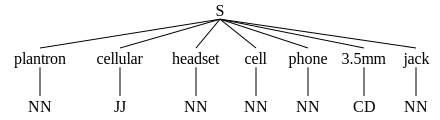

In [94]:
named_entities = nltk.ne_chunk(pos)
named_entities

In [95]:
myTokens = nltk.word_tokenize("Plantronics - Cellular Headset for Cell Phones with a 3.5mm Jack".lower())
myTokens = [stemmer.stem(token) for token in myTokens]
myTokens = [token for token in myTokens if not token in stop_words]
myTokens = [token for token in myTokens if re.search("\w", token) is not None]
myTokens

['plantron', 'cellular', 'headset', 'cell', 'phone', '3.5mm', 'jack']

In [41]:
import pandas as pd
source_file = "/workspace/datasets/fasttext/transformed.fasttext"

df=pd.read_csv(source_file, names=["category"], sep="\t", engine="python")
df
# df[['category','product_name']] = df["category"].str.split(" ", 1, expand=True)
# df

,category
__label__abcat0811008,plantron cellular headset cell phone 3.5mm jack
__label__abcat0811007,dynex® mobil charger select samsung cell phone
__label__abcat0811007,dynex® mobil charger select lg cell phone
__label__abcat0811007,dynex® mobil charger select motorola cell phone
__label__abcat0811007,dynex mobil charger select nokia cell phone
...,...
__label__abcat0205001,mk sound home theater system packag
__label__pcmcat142900050010,black/chrom skullcandi earbud armband ipod nan...
__label__pcmcat142900050010,blue skullcandi earbud armband ipod nano® micr...
__label__pcmcat142900050010,pink skullcandi earbud armband ipod nano® micr...


In [21]:
categories = df.groupby("category")
minProducts = 50
withMinProducts = categories.filter(lambda x: len(x) >= minProducts)
withMinProducts

,category,product_name
0,__label__abcat0811008,plantron cellular headset cell phone 3.5mm jack
1,__label__abcat0811007,dynex® mobil charger select samsung cell phone
2,__label__abcat0811007,dynex® mobil charger select lg cell phone
3,__label__abcat0811007,dynex® mobil charger select motorola cell phone
4,__label__abcat0811007,dynex mobil charger select nokia cell phone
...,...,...
115353,__label__abcat0205001,mk sound home theater system packag
115354,__label__pcmcat142900050010,black/chrom skullcandi earbud armband ipod nan...
115355,__label__pcmcat142900050010,blue skullcandi earbud armband ipod nano® micr...
115356,__label__pcmcat142900050010,pink skullcandi earbud armband ipod nano® micr...


In [35]:
dest_file = "/workspace/datasets/fasttext/transformed2.fasttext"
withMinProducts.to_csv(dest_file, sep=" ", index=None, header=None, quoting=False, doublequote=False)

In [44]:
min_products = 50
src_file = "/workspace/datasets/fasttext/transformed.fasttext"
print("Only writing categories having more than %d products" % min_products)
df = pd.read_csv(src_file, names=["category", "product_name"], sep="\t", engine="python")
df
categories = df.groupby("category").filter(lambda x: len(x) >= min_products)
# filtered_file = src_file + "_" + str(min_products)
# print("Writing filtered results to %s" % filtered_file)
# categories.to_csv(filtered_file, sep="\t", index=None, header=None)
categories


Only writing categories having more than 50 products


,category,product_name
0,__label__abcat0811008,plantron cellular headset cell phone 3.5mm jack
1,__label__abcat0811007,dynex® mobil charger select samsung cell phone
2,__label__abcat0811007,dynex® mobil charger select lg cell phone
3,__label__abcat0811007,dynex® mobil charger select motorola cell phone
4,__label__abcat0811007,dynex mobil charger select nokia cell phone
...,...,...
115353,__label__abcat0205001,mk sound home theater system packag
115354,__label__pcmcat142900050010,black/chrom skullcandi earbud armband ipod nan...
115355,__label__pcmcat142900050010,blue skullcandi earbud armband ipod nano® micr...
115356,__label__pcmcat142900050010,pink skullcandi earbud armband ipod nano® micr...
